In [25]:
import pandas as pd
import numpy as np
from sklearn.naive_bayes import MultinomialNB
from sklearn.preprocessing import OneHotEncoder

In [26]:
data = pd.read_csv('churn_dataset_train.csv')
data

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
0,AR,173,area_code_408,no,no,0,154.6,81,26.28,147.3,100.0,12.52,132.9,99,5.98,6.9,5,1.86,0,no
1,ID,127,area_code_408,no,no,0,102.8,128,17.48,143.7,95.0,12.21,191.4,97,8.61,10.0,5,2.70,1,no
2,TX,91,area_code_415,no,no,0,251.5,57,42.76,179.1,113.0,15.22,163.2,72,7.34,6.6,3,1.78,1,no
3,ND,60,area_code_510,no,no,0,203.2,99,NaN,235.8,131.0,20.04,224.9,112,10.12,15.1,6,4.08,2,no
4,NV,83,area_code_510,no,yes,31,129.8,87,22.07,183.4,110.0,15.59,169.4,40,7.62,14.3,6,3.86,1,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3495,WI,98,area_code_415,yes,yes,20,186.2,112,NaN,145.3,65.0,12.35,142.8,104,6.43,10.9,4,2.94,3,no
3496,CT,144,area_code_510,yes,yes,35,174.8,127,29.72,219.6,93.0,18.67,255.8,90,11.51,12.8,3,3.46,0,no
3497,OR,153,area_code_415,no,no,0,202.2,132,34.37,158.9,78.0,13.51,111.4,98,5.01,8.6,4,2.32,2,no
3498,NJ,112,area_code_510,no,yes,22,244.7,104,41.60,203.1,88.0,17.26,222.0,84,9.99,7.4,6,2.00,0,no


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3500 entries, 0 to 3499
Data columns (total 20 columns):
state                            3500 non-null object
account_length                   3500 non-null int64
area_code                        3500 non-null object
international_plan               3500 non-null object
voice_mail_plan                  3500 non-null object
number_vmail_messages            3500 non-null int64
total_day_minutes                3500 non-null float64
total_day_calls                  3500 non-null int64
total_day_charge                 3216 non-null float64
total_eve_minutes                3500 non-null float64
total_eve_calls                  3269 non-null float64
total_eve_charge                 3500 non-null float64
total_night_minutes              3500 non-null float64
total_night_calls                3500 non-null int64
total_night_charge               3500 non-null float64
total_intl_minutes               3500 non-null float64
total_intl_calls         

In [4]:
data['total_day_charge'].fillna(value=data['total_day_charge'].mean(), inplace=True)
data['total_eve_calls'].fillna(value=data['total_eve_calls'].mean(), inplace=True)
data

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
0,AR,173,area_code_408,no,no,0,154.6,81,26.280000,147.3,100.0,12.52,132.9,99,5.98,6.9,5,1.86,0,no
1,ID,127,area_code_408,no,no,0,102.8,128,17.480000,143.7,95.0,12.21,191.4,97,8.61,10.0,5,2.70,1,no
2,TX,91,area_code_415,no,no,0,251.5,57,42.760000,179.1,113.0,15.22,163.2,72,7.34,6.6,3,1.78,1,no
3,ND,60,area_code_510,no,no,0,203.2,99,30.643193,235.8,131.0,20.04,224.9,112,10.12,15.1,6,4.08,2,no
4,NV,83,area_code_510,no,yes,31,129.8,87,22.070000,183.4,110.0,15.59,169.4,40,7.62,14.3,6,3.86,1,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3495,WI,98,area_code_415,yes,yes,20,186.2,112,30.643193,145.3,65.0,12.35,142.8,104,6.43,10.9,4,2.94,3,no
3496,CT,144,area_code_510,yes,yes,35,174.8,127,29.720000,219.6,93.0,18.67,255.8,90,11.51,12.8,3,3.46,0,no
3497,OR,153,area_code_415,no,no,0,202.2,132,34.370000,158.9,78.0,13.51,111.4,98,5.01,8.6,4,2.32,2,no
3498,NJ,112,area_code_510,no,yes,22,244.7,104,41.600000,203.1,88.0,17.26,222.0,84,9.99,7.4,6,2.00,0,no


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3500 entries, 0 to 3499
Data columns (total 20 columns):
state                            3500 non-null object
account_length                   3500 non-null int64
area_code                        3500 non-null object
international_plan               3500 non-null object
voice_mail_plan                  3500 non-null object
number_vmail_messages            3500 non-null int64
total_day_minutes                3500 non-null float64
total_day_calls                  3500 non-null int64
total_day_charge                 3500 non-null float64
total_eve_minutes                3500 non-null float64
total_eve_calls                  3500 non-null float64
total_eve_charge                 3500 non-null float64
total_night_minutes              3500 non-null float64
total_night_calls                3500 non-null int64
total_night_charge               3500 non-null float64
total_intl_minutes               3500 non-null float64
total_intl_calls         

In [6]:
train = data[data.columns[:-1]]
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3500 entries, 0 to 3499
Data columns (total 19 columns):
state                            3500 non-null object
account_length                   3500 non-null int64
area_code                        3500 non-null object
international_plan               3500 non-null object
voice_mail_plan                  3500 non-null object
number_vmail_messages            3500 non-null int64
total_day_minutes                3500 non-null float64
total_day_calls                  3500 non-null int64
total_day_charge                 3500 non-null float64
total_eve_minutes                3500 non-null float64
total_eve_calls                  3500 non-null float64
total_eve_charge                 3500 non-null float64
total_night_minutes              3500 non-null float64
total_night_calls                3500 non-null int64
total_night_charge               3500 non-null float64
total_intl_minutes               3500 non-null float64
total_intl_calls         

In [7]:
ob = OneHotEncoder().fit_transform(train[['state','area_code','international_plan','voice_mail_plan']]).toarray()
ob.shape

(3500, 58)

In [8]:
number = train.select_dtypes(exclude=['object']).to_numpy()
number.shape

(3500, 15)

In [9]:
train1 = np.concatenate((ob, number), axis=1)
train2 = train1[:3000]
validate = train1[3000:]
validate.shape

(500, 73)

In [10]:
clf = MultinomialNB().fit(train2, data.churn[:3000])

In [11]:
#We can use validating crossing to measure model generate predictions for out-of-sample data
#We we can repeat this process for 10 times to prevent overfitting
validate_pre = clf.predict(validate)
cnt = 0
for i in range(500):
    if validate_pre[i] == data.churn[3000:].iloc[i]:
        cnt += 1
validate_accuracy = cnt/500
validate_accuracy

0.65

In [12]:
#Use confusion matrix to measure the model with validating dataset
#We should also use confusion matrix to measure the model if we have test dataset labels
from sklearn.metrics import confusion_matrix
confusion_matrix(data.churn[3000:], validate_pre)

array([[290, 149],
       [ 26,  35]])

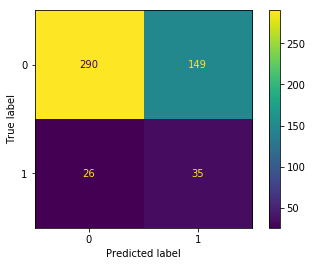

In [16]:
from sklearn.metrics import ConfusionMatrixDisplay
cm = confusion_matrix(data.churn[3000:], validate_pre)
cm_display = ConfusionMatrixDisplay(cm).plot()
cm_display

In [19]:
#We can see apparently that the first 55 vectors' weights are too small
#Considering we just want several features that are the most relevant for predicting the output
#In next cell we ignore the first 55 vectors
weight = clf.coef_
weight

array([[-11.46277365, -10.87498698, -10.87498698, -11.12630141,
        -10.76962646, -11.28045209, -10.87498698, -11.46277365,
        -10.87498698, -11.6859172 , -11.28045209, -11.6859172 ,
        -11.12630141, -11.12630141, -11.28045209, -10.58730491,
        -10.67431628, -10.67431628, -11.12630141, -10.67431628,
        -10.58730491, -10.67431628, -10.67431628, -10.23899821,
        -10.99277002, -10.67431628, -10.23899821, -11.12630141,
        -11.46277365, -11.6859172 , -10.99277002,  -9.89415773,
        -11.12630141, -10.29962284, -10.87498698, -10.76962646,
        -10.43315423, -10.87498698, -11.28045209, -11.46277365,
        -10.43315423, -10.99277002, -10.87498698, -10.5072622 ,
        -10.58730491, -11.46277365, -11.12630141, -10.43315423,
        -10.99277002, -10.36416136, -11.28045209,  -8.39938272,
         -7.72035342,  -8.36268136,  -7.33241865,  -8.31003762,
         -7.16412862,  -8.977867  ,  -2.41693063,  -5.55632247,
         -1.67537394,  -2.41039788,  -3.

In [20]:
#We can see the top 3 important features are 'total_eve_minutes', 'total_day_minutes', 'total_night_minutes'
feature_weight = {'account_length':weight[0][-15]}
for i in range(14):
    feature_weight[train.columns[5:][i]] = weight[0][59:][i]
feature_weight
top3 = sorted(feature_weight, key=lambda a:feature_weight[a], reverse=True)[:3]
top3

['total_eve_minutes', 'total_day_minutes', 'total_night_minutes']

In [21]:
test = pd.read_csv('churn_dataset_test.csv')
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 750 entries, 0 to 749
Data columns (total 21 columns):
index                            750 non-null int64
state                            750 non-null object
account_length                   750 non-null int64
area_code                        750 non-null object
international_plan               750 non-null object
voice_mail_plan                  750 non-null object
number_vmail_messages            750 non-null int64
total_day_minutes                750 non-null float64
total_day_calls                  750 non-null int64
total_day_charge                 694 non-null float64
total_eve_minutes                750 non-null float64
total_eve_calls                  692 non-null float64
total_eve_charge                 750 non-null float64
total_night_minutes              750 non-null float64
total_night_calls                750 non-null int64
total_night_charge               750 non-null float64
total_intl_minutes               750 non-null

In [22]:
test['total_day_charge'].fillna(value=test['total_day_charge'].mean(), inplace=True)
test['total_eve_calls'].fillna(value=test['total_eve_calls'].mean(), inplace=True)
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 750 entries, 0 to 749
Data columns (total 21 columns):
index                            750 non-null int64
state                            750 non-null object
account_length                   750 non-null int64
area_code                        750 non-null object
international_plan               750 non-null object
voice_mail_plan                  750 non-null object
number_vmail_messages            750 non-null int64
total_day_minutes                750 non-null float64
total_day_calls                  750 non-null int64
total_day_charge                 750 non-null float64
total_eve_minutes                750 non-null float64
total_eve_calls                  750 non-null float64
total_eve_charge                 750 non-null float64
total_night_minutes              750 non-null float64
total_night_calls                750 non-null int64
total_night_charge               750 non-null float64
total_intl_minutes               750 non-null

In [23]:
test1 = test.loc[:, 'state':'number_customer_service_calls']
ob1=OneHotEncoder().fit_transform(test1[['state','area_code','international_plan','voice_mail_plan']]).toarray()
number1 = test1.select_dtypes(exclude=['object']).to_numpy()
test2 = np.concatenate((ob1, number1), axis=1)
predicted = clf.predict(test2)

In [24]:
predictions_churn_dataset_test = test.loc[:, 'index':'number_customer_service_calls']
predictions_churn_dataset_test['churn'] = predicted
predictions_churn_dataset_test.to_csv("predictions_churn_dataset_test.csv", index = False)